<a href="https://colab.research.google.com/github/slvrsrfrrr/Machine-Learning/blob/main/Customer_Segmentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation Analysis
- clustering method.
- unsupervised learning


The goal of this project is to create an accurate model that can segment customer information into groups, based on habits. **These groups may be previously unknown**, so this type of analysis can be very impactful.

In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


getting a quick look at the data formatting

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### information

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


so theres 200 data points

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Exploratory Data Analysis

In [20]:
print(df['Gender'].dtype)
print(df['Gender'].isnull().sum())
print(df['Gender'].unique())

object
0
['Male' 'Female']


<Axes: xlabel='Gender', ylabel='count'>

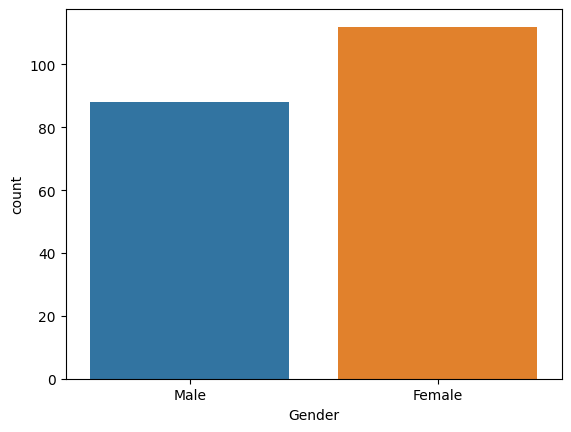

In [22]:
sns.countplot(x ='Gender', data = df)

so we can see that there are more female data points. there are slightly more female customers than male.

<Axes: xlabel='Age', ylabel='Density'>

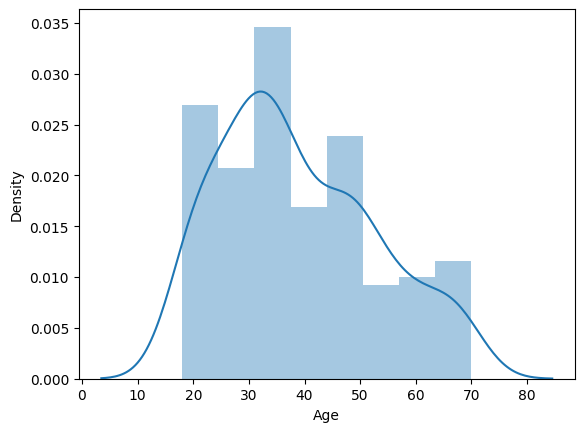

In [24]:
sns.distplot(df['Age'])

The majority of customers in their 30s. almost uniform but slightly skewed to younger customers.

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

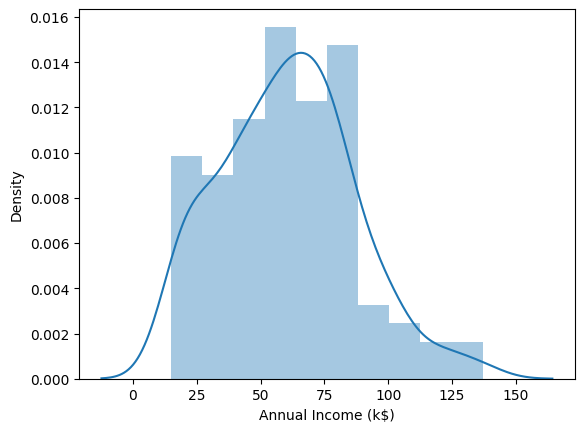

In [25]:
sns.distplot(df['Annual Income (k$)'])

this is pretty uniform.

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

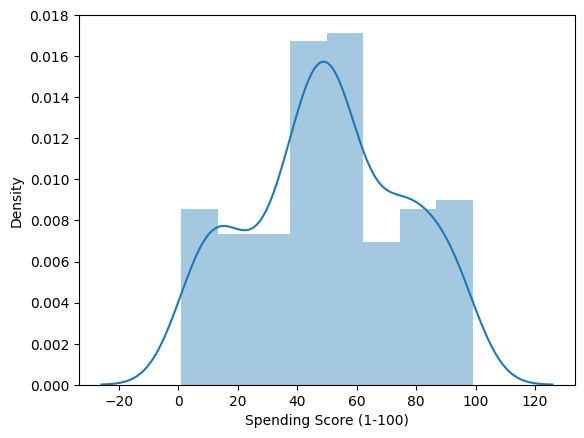

In [26]:
sns.distplot(df['Spending Score (1-100)'])

this looks a bit funny, because of how its scored. majority of the spending scores are between 40-60

### correlation matrix

In [33]:
df = df.drop('CustomerID', axis=1)

<Axes: >

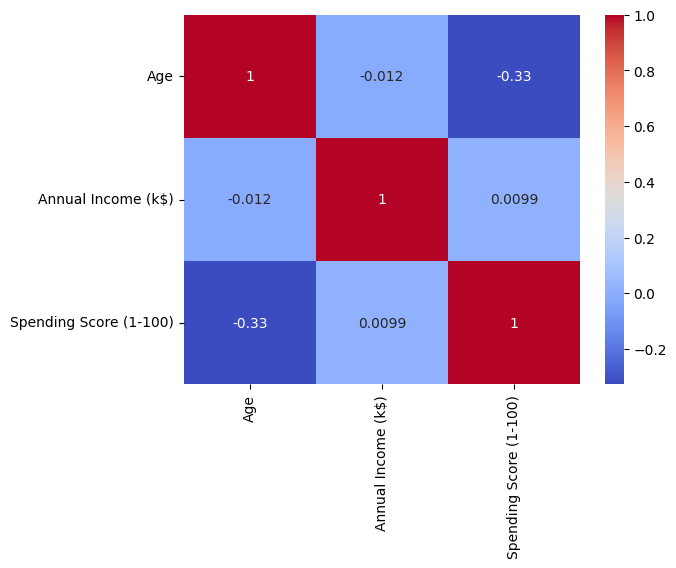

In [34]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

so we can see that age: spending score have a slightly negative correlation. Annual income isnt strongly correlated to spending score - not something I would have guessed.

## Clustering

before clustering, we're going to convert the gender into numerical catagories.

In [36]:
df1= df[['Annual Income (k$)','Spending Score (1-100)']]

In [37]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

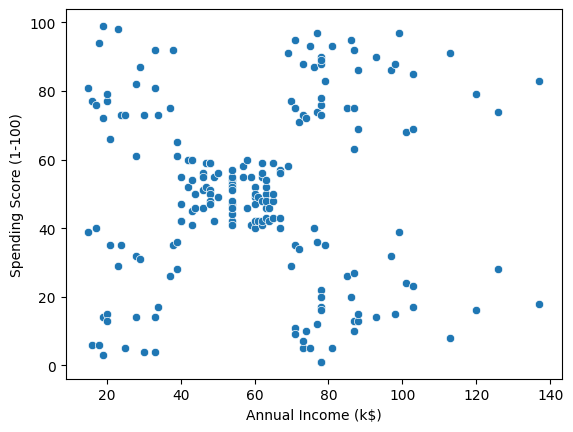

In [39]:
sns.scatterplot(x=df1['Annual Income (k$)'], y=df1['Spending Score (1-100)'])

we can already see some sort of segmentation

In [41]:
from sklearn.cluster import KMeans
errors = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df1)
  errors.append(kmeans.inertia_)

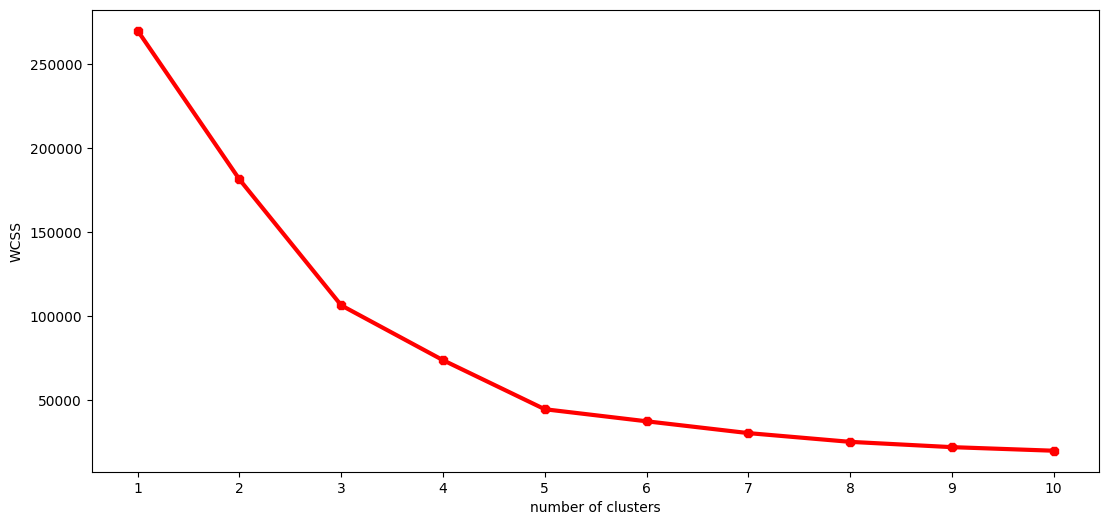

In [44]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

this is called the elbow method, because the splot looks similar to an elbow? kinda ?
The elbow point is 5, so thats the number of clusters.

In [45]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


this is the cluster label for each sample

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

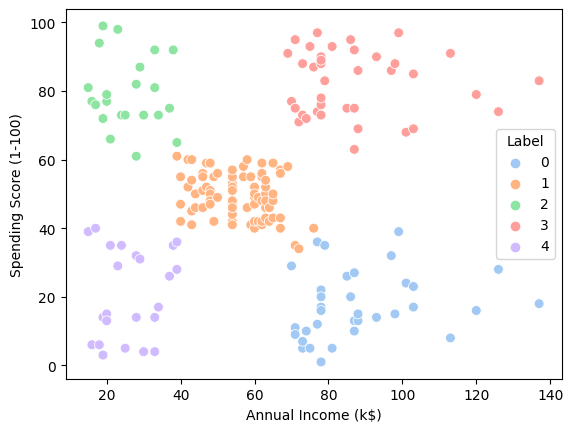

In [48]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df1, hue='Label',s=50,palette='pastel')

## Clustering on 3 features

In [50]:
df2= df[['Annual Income (k$)','Spending Score (1-100)','Age']]

errors = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df2)
  errors.append(kmeans.inertia_)


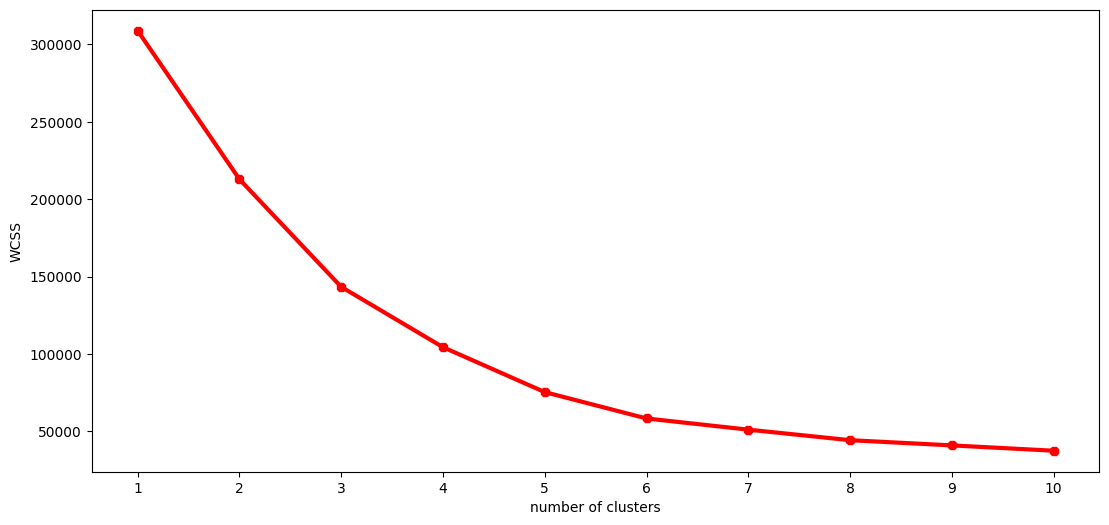

In [51]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [52]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,3
1,15,81,21,4
2,16,6,20,3
3,16,77,23,4
4,17,40,31,3


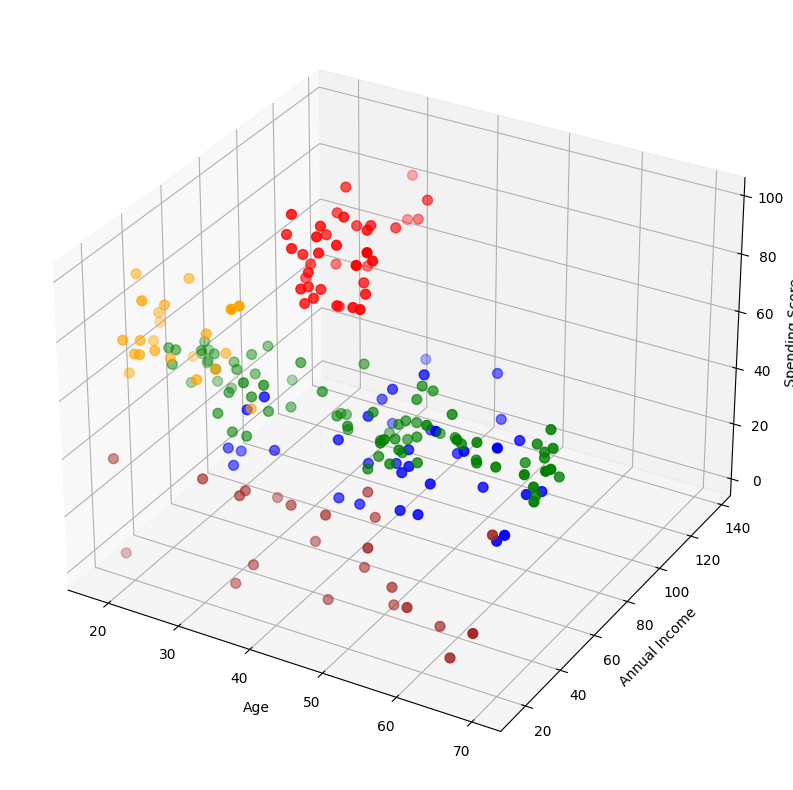

In [60]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Age'][df2['Label']==0],df2['Annual Income (k$)'][df2['Label']==0],df2['Spending Score (1-100)'][df2['Label']==0], c='red',s=50)
ax.scatter(df2['Age'][df2['Label']==1],df2['Annual Income (k$)'][df2['Label']==1],df2['Spending Score (1-100)'][df2['Label']==1], c='green',s=50)
ax.scatter(df2['Age'][df2['Label']==2],df2['Annual Income (k$)'][df2['Label']==2],df2['Spending Score (1-100)'][df2['Label']==2], c='blue',s=50)
ax.scatter(df2['Age'][df2['Label']==3],df2['Annual Income (k$)'][df2['Label']==3],df2['Spending Score (1-100)'][df2['Label']==3], c='brown',s=50)
ax.scatter(df2['Age'][df2['Label']==4],df2['Annual Income (k$)'][df2['Label']==4],df2['Spending Score (1-100)'][df2['Label']==4], c='orange',s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()